In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import math
from random import shuffle
import random
random.seed(0)
import sys
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
x2d, y2d_true = make_blobs(n_samples=10, centers=2, cluster_std=1, n_features=2)
x2d, y2d_true

(array([[ -0.57798549,   1.05349252],
        [  0.35100483,   0.56694478],
        [-10.74561999,   0.058728  ],
        [ -1.76627037,   0.01478343],
        [ -1.02256061,   1.70904347],
        [ -9.84896855,  -1.3052538 ],
        [-11.89022314,  -0.23995548],
        [ -9.68555726,  -0.09175454],
        [ -9.40767228,  -0.92689233],
        [ -1.01441363,   0.22359028]]),
 array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0]))

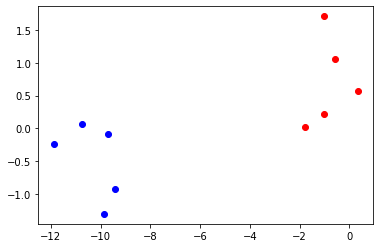

In [3]:
for i in range(len(x2d)):
    if y2d_true[i] == 0:
        plt.scatter(x2d[i][0], x2d[i][1], color = 'red')
    elif y2d_true[i] == 1:
        plt.scatter(x2d[i][0], x2d[i][1], color = 'blue')

In [4]:
x3d, y3d_true = make_blobs(n_samples=10, centers=2, cluster_std=1, n_features=3)
x3d, y3d_true

(array([[ 0.14530615,  0.45701529,  5.57585982],
        [ 0.5868565 ,  2.23277059,  5.09150898],
        [-4.14141516, -5.1745369 ,  1.18703415],
        [ 0.4164601 ,  2.30256712,  9.71454902],
        [-4.00348614, -5.0858573 , -0.44997541],
        [-0.25506194,  0.8343777 ,  7.74705486],
        [-4.9535693 , -5.45046785, -1.26524473],
        [-4.6303993 , -6.5072258 , -0.52487539],
        [-1.208661  , -1.09516953,  8.58216435],
        [-3.85695219, -6.29451943, -0.52222906]]),
 array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0]))

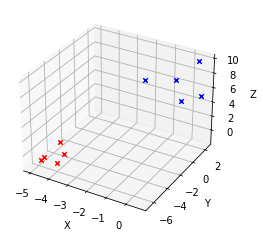

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection ='3d')

#plotting the dots
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')

for i, v in enumerate(x3d):
    if y3d_true[i] == 0:
        ax.scatter(v[0], v[1], v[2], marker = 'x', color = 'red')
    if y3d_true[i] == 1:
        ax.scatter(v[0], v[1], v[2], marker = 'x', color = 'blue')

In [6]:
# initially everyone is in its own cluster
h_clusters = {k: [list(val)] for k,val in enumerate(x2d)}
h_clusters

{0: [[-0.5779854935305382, 1.053492519129942]],
 1: [[0.3510048286697156, 0.5669447779806094]],
 2: [[-10.745619991708411, 0.05872799585032583]],
 3: [[-1.7662703737808874, 0.014783429639350532]],
 4: [[-1.022560605435682, 1.709043470334457]],
 5: [[-9.848968545334852, -1.3052538033330392]],
 6: [[-11.890223141201957, -0.23995548330251443]],
 7: [[-9.685557256621184, -0.09175454223011525]],
 8: [[-9.407672279188597, -0.9268923329808378]],
 9: [[-1.0144136330519138, 0.22359028308857343]]}

In [7]:
# #euclidean single link
# import math
# def euclidean_distance(cc, p):
#     return math.sqrt( sum((e1 - e2)**2 for e1, e2 in zip(cc,p)))

# def Euclidean_singleLink(x, y):
#     tmp_min_d = 100000000
#     for val1 in x:
#         for val2 in y:
#             tmp_d = euclidean_distance(val1, val2)
#             if tmp_d < tmp_min_d:
#                 tmp_min_d = tmp_d
#     return tmp_min_d


# #euclidean complete link
# import math
# def euclidean_distance(cc, p):
#     return math.sqrt( sum((e1 - e2)**2 for e1, e2 in zip(cc,p)))

# def Euclidean_completeLink(x, y):
# #need to start from 0
#     tmp_min_d = 0
#     for val1 in x:
#         for val2 in y:
#             tmp_d = euclidean_distance(val1, val2)
# #this is the condition to find the furthest distances
#             if tmp_d > tmp_min_d:
#                 tmp_min_d = tmp_d
#     return tmp_min_d

#euclidean average link 
import math
def euclidean_distance(cc, p):
    return math.sqrt( sum((e1 - e2)**2 for e1, e2 in zip(cc,p)))

def Euclidean_completeLink(x, y):
    tmp_min_d = []
    for val1 in x:
        for val2 in y:
            tmp_min_d.append(euclidean_distance(val1, val2))
    return np.mean(tmp_min_d)

In [8]:
#manhattan distance
def manhattan_distance(cc,p):
    return sum( abs(e1-e2) for e1, e2 in zip(cc,p))

def Manhattan_singleLink(x, y):
    tmp_min_d = float('inf')
    for val1 in x:
        for val2 in y:
            tmp_d = manhattan_distance(val1, val2)
            if tmp_d < tmp_min_d:
                tmp_min_d = tmp_d
    return tmp_min_d

In [9]:
def minkowski_distance(cc, point, p):
    return sum(abs(e1-e2)**p for e1, e2 in zip(cc, point))**(1/p)

def Minkowski_singleLink(x, y, p):
    tmp_min_d = float('inf')
    for val1 in x:
        for val2 in y:
            tmp_d = minkowski_distance(val1, val2, p)
            if tmp_d < tmp_min_d:
                tmp_min_d = tmp_d
    return tmp_min_d

minkowski_distance([0,0], [5,5], 3)

6.299605249474365

In [10]:
#cosine distance
def cosine_distance(cc, p):
    numerator = 0
    sum_x = 0
    sum_y = 0
    for a,b in zip(cc,p):
        numerator+=sum([a*b])
        sum_x+=sum([a**2])
        sum_y += sum([b**2])
    denominator = sqrt(sum_x)*sqrt(sum_y)
    return 1 - (numerator/denominator)

def Cosine_singleLink(x, y):
    tmp_min_d = float('inf')
    for val1 in x:
        for val2 in y:
            tmp_d = cosine_distance(val1, val2)
            if tmp_d < tmp_min_d:
                tmp_min_d = tmp_d
    return tmp_min_d

In [11]:
n_iter = 1
for n in range(n_iter):

    hierarchy_distance = {}
    for k1, val1 in h_clusters.items(): # 0, 1
        for k2, val2 in h_clusters.items():
            if k1!=k2:
                hierarchy_distance[(k1,k2)] = Euclidean_completeLink(val1, val2)
    
    hierarchy_distance = sorted(hierarchy_distance.items(), key = lambda kv: kv[1])

    #arbitrarily set new cluster id
    merged_cluster_index = min(hierarchy_distance[0][0])

    for id in hierarchy_distance[0][0]:
        if id != merged_cluster_index:
            for jj in h_clusters[id]:
                h_clusters[merged_cluster_index].append(jj)
            del h_clusters[id]

centers = []
# print the clusters with more than 1 item
for key,val in h_clusters.items():
    if len(val) > 1:
        print(key,val, '\n')
        centers.append(key)

5 [[-9.848968545334852, -1.3052538033330392], [-9.407672279188597, -0.9268923329808378]] 



IndexError: list index out of range

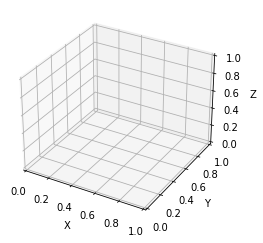

In [12]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')

for key, val in h_clusters.items():
    for v in val:
        if len(val) > 1:
            ax.scatter(v[0], v[1], v[2], marker = 'x', color = 'red')
        else:
            ax.scatter(v[0], v[1], v[2], marker = 'x', color = 'blue')

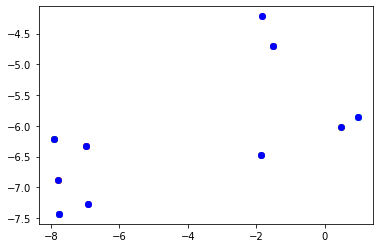

In [ ]:
centroid = []
# print the clusters with more than 1 item
for key,val in h_clusters.items():
    if len(val) > 1:
        centroid.append(key)

for key, val in h_clusters.items():
    for v in val:
        if key in centers:
            plt.scatter(v[0], v[1], marker='X')

        if len(val) > 1:
            plt.scatter(v[0], v[1], color = 'blue')
        else:
            plt.scatter(v[0], v[1], color = 'red')